In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
veri = pd.read_csv("../data/data1/mnist.csv")
print("Verinin Boyutu: ", veri.shape)
veri.head()

Verinin Boyutu:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# etiketleri ayırma 
Y_veri = veri["label"]
# x eğitim veri seti oluştur
X_veri = veri.drop(["label"], axis=1)
print("x veri:", X_veri.shape)
print("y veri", Y_veri.shape)

X_veri_half = X_veri.sample(frac=0.5, random_state=1)
Y_veri_half = Y_veri.loc[X_veri_half.index]

print("X_veri_half", X_veri_half.shape)
print("Y_veri_half:", Y_veri_half.shape)

x veri: (42000, 784)
y veri (42000,)
X_veri_half (21000, 784)
Y_veri_half: (21000,)


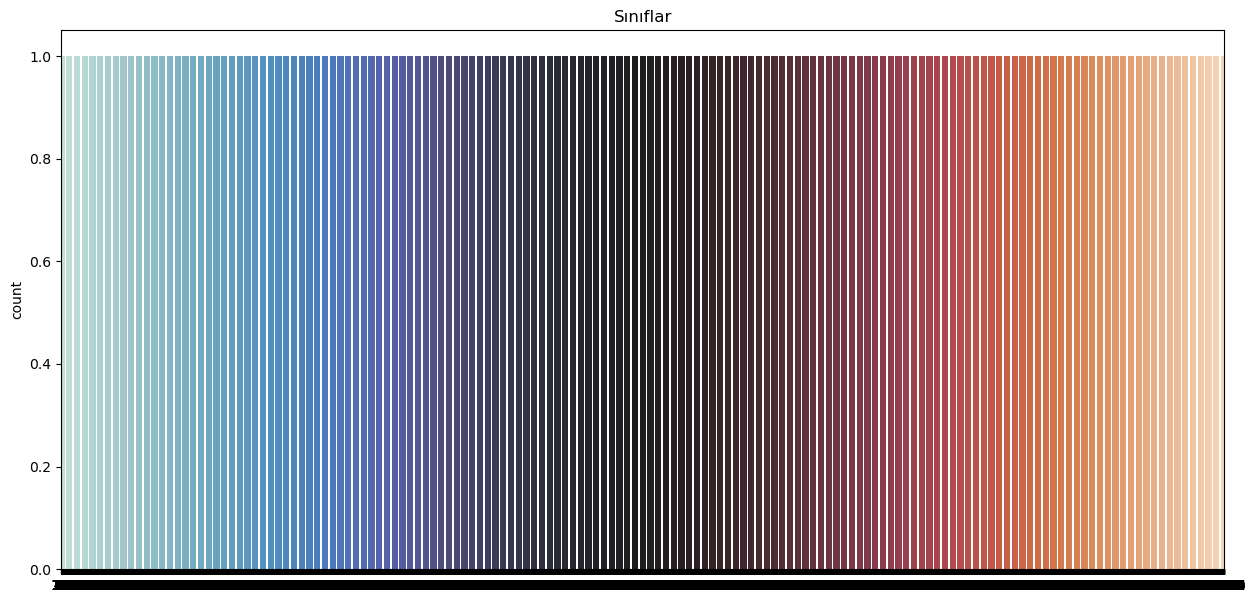

Sınıflar ve örnek sayıları:  label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [7]:
# her bir rakamdan kaçar tane olduğuna bakma
plt.figure(figsize=(15,7))
g = sns.countplot(Y_veri_half, palette="icefire")
plt.title("Sınıflar")
plt.show()
print("Sınıflar ve örnek sayıları: ", Y_veri_half.value_counts())

In [10]:
resim_boyutu =  int(np.sqrt(X_veri_half.shape[1]))
resim_boyutu

28

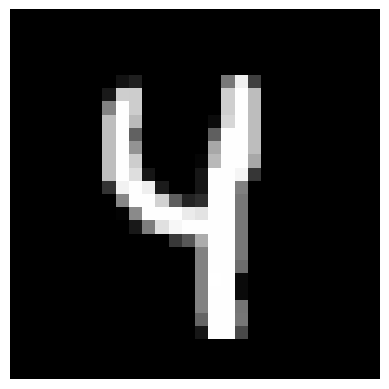

In [15]:
resim1 = X_veri_half.iloc[3400].values
resim1 = resim1.reshape((resim_boyutu,resim_boyutu))
plt.imshow(resim1, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
# veriyi normalize etme
X_veri_half = X_veri_half / 255.0


In [18]:
# Reshape
X_veri_half = X_veri_half.values.reshape(-1,28,28,1)
print("X eğitim boyut: ", X_veri_half.shape)

X eğitim boyut:  (21000, 28, 28, 1)


In [24]:
# etiket kodlama
from keras_core.utils import to_categorical # vektöre çevirmek için
Y_veri_half = to_categorical(Y_veri_half, num_classes = 10)

In [26]:
# eğitim test ve bölünmesi

from sklearn.model_selection import train_test_split
X_egitim, X_test, Y_egitim, Y_test =train_test_split(X_veri_half, Y_veri_half, test_size=0.1, random_state=2)

print("X eğitim boyu : ", X_egitim.shape) 
print("X Test boyu: ", X_test.shape)
print("Y Eğitimn boyu: ", Y_egitim.shape)
print("Y Test boyu: ", Y_test.shape)

X eğitim boyu :  (18900, 28, 28, 1)
X Test boyu:  (2100, 28, 28, 1)
Y Eğitimn boyu:  (18900, 10)
Y Test boyu:  (2100, 10)


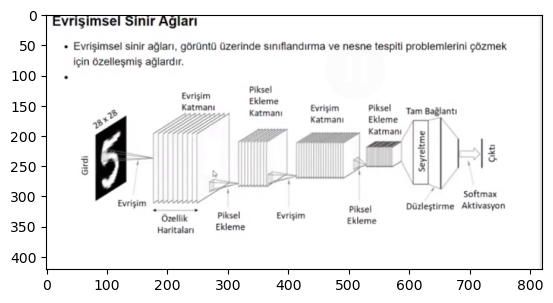

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
evrimsel_sinir_aglari = {"image_path":["../data/data1/evrimsel-sinir-aglari.png"]}
evrimsel_sinir_aglari = pd.DataFrame(evrimsel_sinir_aglari)

image_path = evrimsel_sinir_aglari.loc[0, 'image_path']
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()